# 線形判別分析（LDA）

## フィッシャーの線形判別

高次元データの教師あり特徴抽出（次元削減）の手法の1つ。  
以下の条件がうまくバランスするようにデータを射影する。

- 別クラスのデータをできるだけ遠くへ離す
- 同じクラスのデータをできるだけ近くに固める


## 問題設定

$$n$$ 個の $$d$$ 次元データサンプル

$$
\boldsymbol{x}^{(i)} = \begin{pmatrix}
x_1^{(i)} \\
\vdots \\
x_d^{(i)}
\end{pmatrix}
$$

を $$k\ (\le d)$$ 次元空間へ射影する（$$i = 1, \cdots, n$$）。

## 次元削減の方法


### 1. クラス間・クラス内の共分散行列の計算

$$n_C$$ 個のサンプルが属するクラスラベル $$C$$ のデータサンプル平均

$$
\boldsymbol{m}_C \equiv \displaystyle \cfrac{1}{n_C} \sum_{\boldsymbol{x}^{(i)} \in C} \boldsymbol{x}^{(i)}
$$

全データサンプル平均

$$
\boldsymbol{m} \equiv \displaystyle \cfrac{1}{n} \sum_{i=1}^{n} \boldsymbol{x}^{(i)}
$$

を用いて、以下の2つの行列を計算する。

**クラス間共分散行列**：

$$
\begin{eqnarray}
S_B
&\equiv& \displaystyle \sum_{C} n_C \left( \boldsymbol{m}_C - \boldsymbol{m} \right) \left( \boldsymbol{m}_C - \boldsymbol{m} \right)^T \\
&=& \begin{pmatrix}
\displaystyle \sum_{C} n_C \left(m_{C,1} - m_1 \right) \left(m_{C,1} - m_1 \right) & \cdots & \displaystyle \sum_{C} n_C \left(m_{C,1} - m_1 \right) \left(m_{C,d} - m_d \right) \\
\vdots &  & \vdots \\
\displaystyle \sum_{C} n_C \left(m_{C,d} - m_d \right) \left(m_{C,1} - m_1 \right) & \cdots & \displaystyle \sum_{C} n_C \left(m_{C,d} - m_d \right) \left(m_{C,d} - m_d \right)
\end{pmatrix}
\end{eqnarray}
$$

**クラス内共分散行列**：

$$
\begin{eqnarray}
S_W
&\equiv& \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right) \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right)^T \\
&=& \begin{pmatrix}
\displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( x_1^{(i)} - m_{C,1} \right) \left( x_1^{(i)} - m_{C,1} \right) & \cdots & \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( x_1^{(i)} - m_{C,1} \right) \left( x_d^{(i)} - m_{C,d} \right) \\
\vdots &  & \vdots \\
\displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( x_d^{(i)} - m_{C,d} \right) \left( x_1^{(i)} - m_{C,1} \right) & \cdots & \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( x_d^{(i)} - m_{C,d} \right) \left( x_d^{(i)} - m_{C,d} \right)
\end{pmatrix}
\end{eqnarray}
$$

### 2. 行列の固有方程式を解く

行列 $$S_W^{-1} S_B$$ の固有方程式

$$
S_W^{-1} S_B \boldsymbol{w} = \lambda \boldsymbol{w}
$$

を解き、固有値 $$\lambda$$ とそれに対応する固有ベクトル $$\boldsymbol{w}$$ を求める。

### 3. 固有ベクトルを選択する

固有値 $$\lambda$$ が大きい順に $$k$$ 個の固有ベクトル $$\boldsymbol{w}_1, \cdots, \boldsymbol{w}_k$$ を選ぶ。

### 4. 固有ベクトルにより元データを射影する

選んだ固有ベクトルによる元データの射影

$$
\begin{eqnarray}
\boldsymbol{X}^{(i)} &=& \left( X_1, \cdots, X_k \right) \\
X_j^{(i)} &=& \boldsymbol{x}^{(i)} \cdot \boldsymbol{w}_j
\end{eqnarray}
$$

を求め、新しい特徴量とする。


## 導出

データサンプル $$\boldsymbol{x}^{(i)}$$ を射影する方向ベクトルを

$$
\boldsymbol{w} = \begin{pmatrix}
w_1 \\
\vdots \\
w_d
\end{pmatrix}
$$

と置く。

### 別クラスのデータをできるだけ遠くへ離す

射影の後、クラスが異なるデータサンプルができるだけ離れるようにしたい。  
→ 各クラスのサンプル平均が、全サンプル平均から離れていれば良い

各クラスのサンプル平均と全サンプル平均との間で、射影後の差分の平方和を取って、

$$
\begin{eqnarray}
J_B(\boldsymbol{w})
&\equiv& \displaystyle \sum_{C} n_C \left( \boldsymbol{w} \cdot \boldsymbol{m}_C - \boldsymbol{w} \cdot \boldsymbol{m} \right)^2 \\
&=& \displaystyle \sum_{C} n_C \left( \boldsymbol{w} \cdot \left( \boldsymbol{m}_C - \boldsymbol{m} \right) \right)^2 \\
&=& \displaystyle \sum_{C} n_C \boldsymbol{w}^T \left( \boldsymbol{m}_C - \boldsymbol{m} \right) \left( \boldsymbol{m}_C - \boldsymbol{m} \right)^T \boldsymbol{w} \\
&=& \boldsymbol{w}^T \left( \displaystyle \sum_{C} n_C \left( \boldsymbol{m}_C - \boldsymbol{m} \right) \left( \boldsymbol{m}_C - \boldsymbol{m} \right)^T \right) \boldsymbol{w} \\
&=& \boldsymbol{w}^T S_B \boldsymbol{w}
\end{eqnarray}
$$

これが大きくなれば良い。


### 同じクラスのデータをできるだけ近くに固める

射影の後、クラスが同じデータサンプルはできるだけ近くに固まるようにしたい。  

各データサンプルと、属するクラスのサンプル平均との間で、射影後の差分の平方和を取って、

$$
\begin{eqnarray}
J_W(\boldsymbol{w})
&\equiv& \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( \boldsymbol{w} \cdot \boldsymbol{x}^{(i)} - \boldsymbol{w} \cdot \boldsymbol{m}_C \right)^2 \\
&=& \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( \boldsymbol{w} \cdot \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right) \right)^2 \\
&=& \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \boldsymbol{w}^T \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right) \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right)^T \boldsymbol{w} \\
&=& \boldsymbol{w}^T \left( \displaystyle \sum_{C} \sum_{\boldsymbol{x}^{(i)} \in C} \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right) \left( \boldsymbol{x}^{(i)} - \boldsymbol{m}_C \right)^T \right) \boldsymbol{w} \\
&=& \boldsymbol{w}^T S_W \boldsymbol{w}
\end{eqnarray}
$$

これが小さくなれば良い。

### 最大化問題へ

以上より、$$J_B(\boldsymbol{w})$$ をなるべく大きく、$$J_W(\boldsymbol{w})$$ をなるべく小さくしたいので、

$$
J(\boldsymbol{w}) \equiv \cfrac{J_B(\boldsymbol{w})}{J_W(\boldsymbol{w})} = \cfrac{\boldsymbol{w}^T S_B \boldsymbol{w}}{\boldsymbol{w}^T S_W \boldsymbol{w}}
$$

を最大化するような $$\boldsymbol{w}$$ を求めれば良い。

$$
\begin{eqnarray}
\cfrac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}}
&=& \cfrac{1}{\left( \boldsymbol{w}^T S_W \boldsymbol{w} \right)^2}
\left(
\left( \boldsymbol{w}^T S_W \boldsymbol{w} \right) \left( S_B + S_B^T \right) \boldsymbol{w} -
\left( \boldsymbol{w}^T S_B \boldsymbol{w} \right) \left( S_W + S_W^T \right) \boldsymbol{w}
\right) \\
&=& \cfrac{2}{\left( \boldsymbol{w}^T S_W \boldsymbol{w} \right)^2}
\left(
\left( \boldsymbol{w}^T S_W \boldsymbol{w} \right) S_B \boldsymbol{w} -
\left( \boldsymbol{w}^T S_B \boldsymbol{w} \right) S_W \boldsymbol{w}
\right)
\end{eqnarray}
$$

ここで、
- $$S_B, S_W$$ が対称行列であること（$$S_B^T = S_B, S_W^T = S_W$$）
- 行列の微分の公式 $$\cfrac{\partial}{\partial \boldsymbol{x}} \left( \boldsymbol{x}^T A \boldsymbol{x} \right) = \left( A + A^T \right) \boldsymbol{x}$$

を用いた。

最適解においては

$$
\cfrac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} = 0
$$

であるから、

$$
\left( \boldsymbol{w}^T S_W \boldsymbol{w} \right) S_B \boldsymbol{w} =
\left( \boldsymbol{w}^T S_B \boldsymbol{w} \right) S_W \boldsymbol{w}
$$

スカラー $$\boldsymbol{w}^T S_W \boldsymbol{w}$$ で両辺を割り、左から $$S_W^{-1}$$ をかけると、

$$
S_W^{-1} S_B \boldsymbol{w} =
\cfrac{ \boldsymbol{w}^T S_B \boldsymbol{w} }{ \boldsymbol{w}^T S_W \boldsymbol{w} } \boldsymbol{w}
$$

これは、行列 $$S_W^{-1} S_B$$ の固有方程式であり、固有値 $$\cfrac{ \boldsymbol{w}^T S_B \boldsymbol{w} }{ \boldsymbol{w}^T S_W \boldsymbol{w} }$$ は最大化したい $$J(\boldsymbol{w})$$ そのもの。

$$
S_W^{-1} S_B \boldsymbol{w} =
J(\boldsymbol{w}) \boldsymbol{w}
$$


### 解の選択

固有値が $$J(\boldsymbol{w})$$ の値に一致するので、固有値が大きいものから順に $$k$$ 個の固有ベクトル $$\boldsymbol{w}_1, \cdots, \boldsymbol{w}_k$$ を選べば良い。

行列 $$S_W^{-1} S_B$$ は対称行列であるから、固有ベクトルは互いに直交する（基底にできる）。

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [86]:
import numpy as np

class LDA:
    def __init__(self):
        return
    
    def fit(self, data, labels):
        d = len(data[0])
        m = np.matrix(np.average(data, axis=0))
        mc = {}
        nc = {}
        for l in np.unique(labels):
            indices_l = np.where(labels == l)[0]
            nc[l] = len(indices_l)
            mc[l] = np.matrix(np.average(data[indices_l], axis=0))
        S_B = np.zeros((d, d))
        for l in mc:
            S_B += nc[l] * (mc[l]-m).T * (mc[l]-m)
        S_W = np.zeros((d, d))
        for i in range(len(data)):
            S_W += (data[i]-mc[labels[i]]).T * (data[i]-mc[labels[i]])
        lam, vec = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
        lam = lam.real
        indices = np.argsort(-lam)
        self.contribution = lam[indices] / np.sum(lam)
        self.components = vec[indices].real
    
    def transform(self, data, d):
        """
        Parameters
        ----------
        data : 変換対象のデータ
        d : 射影後のデータ次元数
        """
        result = []
        for comp in self.components[:d]:
            result.append(np.dot(data, comp))
        result = np.array(result).T
        return result

[ 9.91472476e-01  8.52752434e-03 -1.28367427e-16 -1.28367427e-16]
[[-0.1497757   0.0095293  -0.24949233 -0.24949233]
 [-0.14817298  0.32719336  0.15512826  0.15512826]
 [ 0.85112189 -0.57482034  0.70937773  0.70937773]
 [ 0.48083628  0.74995684 -0.43171383 -0.43171383]]


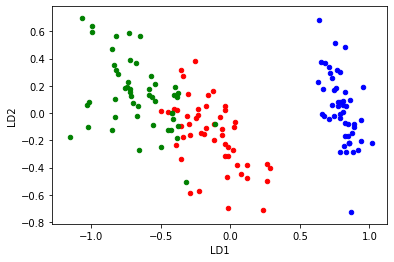

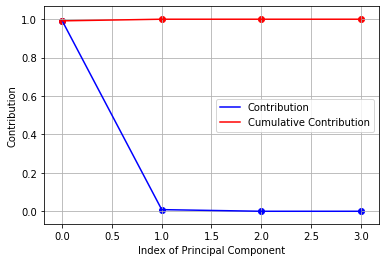

In [89]:
# アイリスデータセットの読み込み
import urllib
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = []
labels = []
label_map = {}
label_cnt = 0
with urllib.request.urlopen(url) as f:
    for line in [l.decode('utf-8').strip() for l in f.readlines()]:
        if len(line) == 0:
            continue
        arr = line.split(',')
        label = arr[-1]
        iris.append([float(x_) for x_ in arr[:-1]])
        labels.append(label)
        if label not in label_map:
            label_map[label] = label_cnt
            label_cnt += 1

labels = np.array([label_map[l] for l in labels])
iris = (iris - np.average(iris, axis=0)) / np.std(iris, axis=0)

# 4次元データを2次元に圧縮
lda = LDA()
lda.fit(iris, labels)
data_new = lda.transform(iris, 2)
print(lda.contribution)
# [ 9.91472476e-01  8.52752434e-03 -1.28367427e-16 -1.28367427e-16]
print(lda.components)
"""
[[-0.1497757   0.0095293  -0.24949233 -0.24949233]
 [-0.14817298  0.32719336  0.15512826  0.15512826]
 [ 0.85112189 -0.57482034  0.70937773  0.70937773]
 [ 0.48083628  0.74995684 -0.43171383 -0.43171383]]
"""

# 変換後の値の描画
plt.xlabel('LD1')
plt.ylabel('LD2')
colors = {0: 'b', 1: 'r', 2: 'g', 3: 'black'}
for i in range(len(data_new)):
    plt.scatter(data_new[i, 0], data_new[i, 1], s=20, c=colors[labels[i]])
plt.show()

# 各主成分ごとの分散説明率 / 累積分散説明率を描画
cumulative_cont = [lda.contribution[0]]
for c in lda.contribution[1:]:
    cumulative_cont.append(cumulative_cont[-1]+c)
plt.xlabel('Index of Principal Component')
plt.ylabel('Contribution')
plt.scatter(range(len(lda.contribution)), lda.contribution, c='b')
plt.plot(range(len(lda.contribution)), lda.contribution, c='b', label='Contribution')
plt.scatter(range(len(lda.contribution)), cumulative_cont, c='r')
plt.plot(range(len(lda.contribution)), cumulative_cont, c='r', label='Cumulative Contribution')
plt.grid()
plt.legend()
plt.show()

[ 6.87478888e-01  3.12521112e-01  7.34801461e-17  2.37827904e-17
  1.57465836e-17  1.57465836e-17  0.00000000e+00 -2.73975065e-18
 -4.81379103e-18 -4.81379103e-18 -3.38143967e-17 -4.16726108e-17
 -4.16726108e-17]
[[-2.64207099e-01 -3.80707836e-01 -4.32953908e-02  1.84896162e-01
  -2.19724589e-01 -2.19724589e-01  4.97495517e-02 -1.00313044e-01
  -2.63236854e-01 -2.63236854e-01  4.41597180e-02  4.41597180e-02
  -2.19028892e-01]
 [-1.17015761e-01 -2.01811693e-01  7.89395730e-02  8.48527324e-02
  -1.12594349e-01 -1.12594349e-01 -6.29635590e-01 -1.70282062e-01
  -1.34753949e-01 -1.34753949e-01 -8.69758963e-03 -8.69758963e-03
  -8.73816485e-02]
 [ 2.43235380e-01  2.89181095e-01  2.21047713e-01  2.48724379e-02
   1.26601195e-01  1.26601195e-01  2.82365461e-01  1.14948419e-02
   5.06447129e-02  5.06447129e-02 -4.37951315e-01 -4.37951315e-01
   4.82612246e-01]
 [ 6.22422410e-02  1.20072723e-01 -7.96006645e-02 -1.23036613e-01
   3.61875617e-02  3.61875617e-02  3.11311738e-01  9.41016773e-02
   1

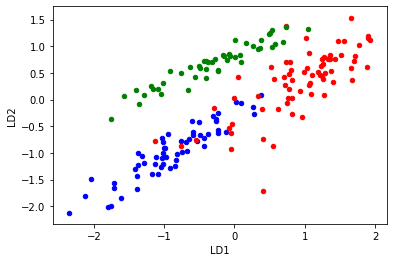

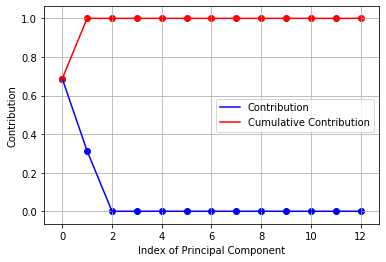

In [90]:
# wine データセットの読み込み
import urllib
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
iris = []
labels = []
label_map = {}
label_cnt = 0
with urllib.request.urlopen(url) as f:
    for line in [l.decode('utf-8').strip() for l in f.readlines()]:
        if len(line) == 0:
            continue
        arr = line.split(',')
        label = arr[0]
        iris.append([float(x_) for x_ in arr[1:]])
        labels.append(label)
        if label not in label_map:
            label_map[label] = label_cnt
            label_cnt += 1

labels = np.array([label_map[l] for l in labels])
iris = (iris - np.average(iris, axis=0)) / np.std(iris, axis=0)

# 13次元データを2次元に圧縮
lda = LDA()
lda.fit(iris, labels)
data_new = lda.transform(iris, 2)
print(lda.contribution)
"""
[ 6.87478888e-01  3.12521112e-01  7.34801461e-17  2.37827904e-17
  1.57465836e-17  1.57465836e-17  0.00000000e+00 -2.73975065e-18
 -4.81379103e-18 -4.81379103e-18 -3.38143967e-17 -4.16726108e-17
 -4.16726108e-17]
"""
print(lda.components)

# 変換後の値の描画
plt.xlabel('LD1')
plt.ylabel('LD2')
colors = {0: 'b', 1: 'r', 2: 'g', 3: 'black'}
for i in range(len(data_new)):
    plt.scatter(data_new[i, 0], data_new[i, 1], s=20, c=colors[labels[i]])
plt.show()

# 各主成分ごとの分散説明率 / 累積分散説明率を描画
cumulative_cont = [lda.contribution[0]]
for c in lda.contribution[1:]:
    cumulative_cont.append(cumulative_cont[-1]+c)
plt.xlabel('Index of Principal Component')
plt.ylabel('Contribution')
plt.scatter(range(len(lda.contribution)), lda.contribution, c='b')
plt.plot(range(len(lda.contribution)), lda.contribution, c='b', label='Contribution')
plt.scatter(range(len(lda.contribution)), cumulative_cont, c='r')
plt.plot(range(len(lda.contribution)), cumulative_cont, c='r', label='Cumulative Contribution')
plt.grid()
plt.legend()
plt.show()